## Table of Contents
* [Goals](#goals)
* [Data](#data)
    * [Loading Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#section2)
    * [Categorical Data](#section2_1)
    * [Qauntitative Data](#section2_2)

### Goals <a class="anchor" id="Goals"></a>
This notebook contains data scraped from a used truck sales websites. The goal of this is project is to do the following:
* Retrieve our data from webscrapes "wild data"
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions
* Store data in a database
* Create a dashboard presentation using Tableau

### Data <a class="anchor" id="Data"></a>
The data for this project was gathered using Web Scraper; a free Edge plug-in, from [equiptment experts](https://www.equipmentexperts.com/). This website shows listings for Class A heavy duty equiptment.

#### Loading the Data <a class="anchor" id="section1_1"></a>
We will import the librarys we plan on using and view the first 5 lines of the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
data = pd.read_csv('equiptment_experts_raw_data.csv')
data.head()

,mileage,dealer,location,price,make,website
0,"461,060 mi",Doggett Freightliner,"Pharr, TX","$34,900",2015 Volvo VNL,https://www.equipmentexperts.com/trucking/heav...
1,"391,294 mi",Arrow Truck Sales,"French Camp, CA","$106,950",2020 KENWORTH T680,https://www.equipmentexperts.com/trucking/heav...
2,"476,567 mi",Bonander Truck & Trailer,"Turlock, CA","$88,500",2016 Freightliner Cascadia,https://www.equipmentexperts.com/trucking/heav...
3,"139,319 mi",Dobbs Peterbilt,"North Little Rock, AR","$171,950",2022 PETERBILT 579,https://www.equipmentexperts.com/trucking/heav...
4,"674,852 mi",Truck and Van Outlet,"Miami, FL","$49,995",2012 Kenworth T700,https://www.equipmentexperts.com/trucking/heav...


#### Data Information <a class="anchor" id="section1_2"></a>
some immediate insights are:
* `mileage` is an object and needs to be stripped and converted to a float. There are also some null values and we should investigate values such as "1 mi"
* `location` column can be split to City and State columns
* `price` dtype needs to be converted to a int and although it is not showing any null values there are values like "Call for Price"
* `make` column needs to be split into "year", "make", "model" and formatted
* `website` dtype needs to be html


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   mileage   8485 non-null   object
 1   dealer    8857 non-null   object
 2   location  8857 non-null   object
 3   price     8857 non-null   object
 4   make      8857 non-null   object
 5   website   8857 non-null   object
dtypes: object(6)
memory usage: 415.3+ KB


In [4]:
data.isnull().sum()

mileage     372
dealer        0
location      0
price         0
make          0
website       0
dtype: int64

In [5]:
data.describe()

,mileage,dealer,location,price,make,website
count,8485,8857,8857,8857,8857,8857
unique,8290,76,498,1694,1299,8857
top,1 mi,Penske Used Trucks,"Covington, TN",Call For Price,2016 FREIGHTLINER X12564ST,https://www.equipmentexperts.com/trucking/heav...
freq,10,2237,804,355,563,1


### Data Cleaning <a class="anchor" id="section2"></a>

#### Categorical Data Cleaning <a class="anchor" id="section2_1"></a>

We will start with seperating all our categorical data into their desired columns
* create `year`, `make`, `model` columns
    * 1 issue was with the format 'Navistar'(Parent Company of International) on International trucks that had different format than the rest of the trucks. I first had to remove this in order properly split the columns
* create `city`, `state` columns
* check our makes and drop any makes in the data that are not Class A vehicles

In [6]:
# removing 'Navistar' from makes so that we can split correctly
data['make'] = data['make'].str.title()
data['make'] = data['make'].str.replace('Navistar', '')

# creating new columns and adding the data to them from the make column
data['year'] = data['make'].apply(lambda x: str(x).split()[0])
data['model'] = data['make'].apply(lambda x: ''.join(str(x).split()[2:]))
data['make'] = data['make'].apply(lambda x: str(x).split()[1])

# creating city and state columns and removing location column
data['city'] = data['location'].apply(lambda x: str(x).split(',')[0])
data['state'] = data['location'].apply(lambda x: str(x).split(',')[1])
data.drop(columns='location', axis=1, inplace=True)

#changing website datatype
def make_clickable(val):
    return f'<a target="_blank" href="{val}">{val}</a>'
data.style.format({'websiite': make_clickable})


data.head()

,mileage,dealer,price,make,website,year,model,city,state
0,"461,060 mi",Doggett Freightliner,"$34,900",Volvo,https://www.equipmentexperts.com/trucking/heav...,2015,Vnl,Pharr,TX
1,"391,294 mi",Arrow Truck Sales,"$106,950",Kenworth,https://www.equipmentexperts.com/trucking/heav...,2020,T680,French Camp,CA
2,"476,567 mi",Bonander Truck & Trailer,"$88,500",Freightliner,https://www.equipmentexperts.com/trucking/heav...,2016,Cascadia,Turlock,CA
3,"139,319 mi",Dobbs Peterbilt,"$171,950",Peterbilt,https://www.equipmentexperts.com/trucking/heav...,2022,579,North Little Rock,AR
4,"674,852 mi",Truck and Van Outlet,"$49,995",Kenworth,https://www.equipmentexperts.com/trucking/heav...,2012,T700,Miami,FL


In [7]:
print(data.make.unique())

['Volvo' 'Kenworth' 'Freightliner' 'Peterbilt' 'Mack' 'International'
 'Western' 'Sterling' 'Ftl' 'Gmc' 'Ford' 'Autocar' 'Cascadia' 'Isuzu'
 '379' 'Caterpillar' 'Kaiser' 'Ccc' 'Chevrolet' '567' 'Oshkosh' 'Bmy']


a couple of issues arrise:
* not all makes are stricly class A
* some models ended up in our makes '567', 'Cascadia'
* 'Ftl' is a 'Freightliner' and 'Western' is a 'Western Star'

In [8]:
# missing year - information not provided by website
# model_error = data[data['make'] == '567']

# incorrect model - information not provided by website
# model_error = data[data['make'] == 'Ftl']

# missing year - information not provided by website
# model_error = data[data['make'] == 'Cascadia']

# can be fixed - only 'make' with 2 words, Star is part of model
#model_error = data[data['make'] == 'Western']
#model_error.head()

# removing Star from model and correcting all Western Star makes
data['model'] = data['model'].apply(lambda x: str(x).strip('Star'))
data['make'] = data['make'].apply(lambda x: x + ' Star' if x == 'Western' else x)

#removing all rows that are not a class A vehicle
class_a = ['Volvo', 'Kenworth', 'Freightliner', 'Peterbilt', 'Mack', 'International', 'Western Star', 'Sterling']
data = data[data['make'].isin(class_a)]
print(data['make'].unique())


['Volvo' 'Kenworth' 'Freightliner' 'Peterbilt' 'Mack' 'International'
 'Western Star' 'Sterling']


We will now work to make the `year` column categorical
* one of the values for `year` is incorrect we will remove that

In [9]:
# getting list of years for categories
years = data['year'].unique()
years

array(['2015', '2020', '2016', '2022', '2012', '2019', '2000', '2017',
       '2018', '2001', '2014', '2008', '2010', '2004', '2005', '2009',
       '2021', '1996', '2013', '2007', '2011', '2006', '1997', '2002',
       '1998', '1999', '1987', '2023', '2003', '1989', '2024', '1988',
       '1993', '1995', '1991', '1986', '1994', '1990', '1985', '1966',
       '1963', '1992', '1982', '1972', '1980', '1979', '1984', '201'],
      dtype=object)

In [20]:
# removing all instances of invalid year using regular expression for 4 digits
data = data[data['year'].apply(lambda x: bool(re.match(r'^\d{4}$', x)))]
years = data['year'].unique()
years

array(['2015', '2020', '2016', '2022', '2012', '2019', '2000', '2017',
       '2018', '2001', '2014', '2010', '2004', '2005', '2009', '2021',
       '2007', '1996', '2011', '2006', '1997', '1998', '2008', '2013',
       '1999', '2003', '1987', '1988', '2002', '2023', '1995', '1991',
       '1994', '1990', '1985', '1966', '1963', '1992', '1989', '1982',
       '1993', '1980', '1979', '1986', '1984'], dtype=object)

#### Qantitiative Data Cleaning <a class="anchor" id="section2_2"></a>
The `mileage` and `price` column are going to be our main columns for analysis so we need to ensure these are the cleanest we will start by:
* converting all psuedo NaN values to an acutal Nan and then removing them from our dataset
* removing commas and strings from `mileage` and converting them to integers
* removing $ and commas from `price` and converting them to floats

Both columns are then looked at using a boxplot for outliers since we have found some we will explore there merit

In [11]:
# replacing values 'nan' and 'Call For Price' with actual Nan values
data['price'] = data['price'].replace('Call For Price', np.NaN)
data['mileage'] = data['mileage'].replace('nan', np.NaN)

#drop all NaN values from mileage and price
data = data.dropna(how = 'any').reset_index(drop=True)

#spliting strings, removing commas, converting to int64 - (some values were too big we need to investigate)
data['mileage'] = data['mileage'].apply(lambda x: str(x).split(' ')[0].replace(',', '')).astype('int64')
data['price'] = data['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')).astype('float')

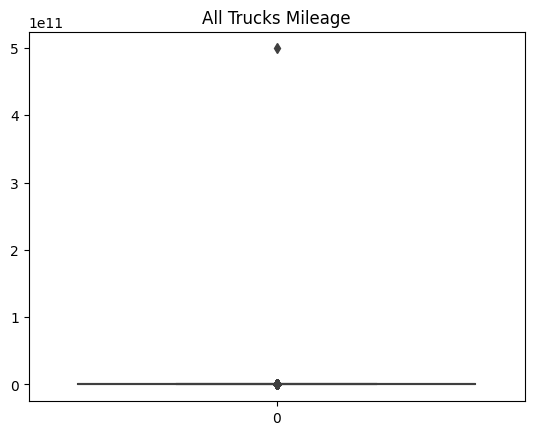

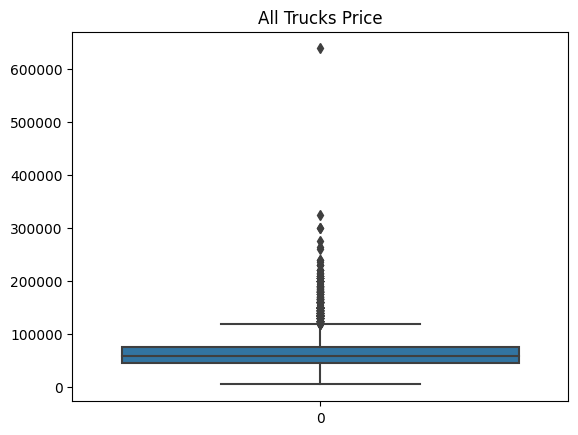

<Figure size 640x480 with 0 Axes>

In [12]:
#plottig boxplot for outlier information
sns.boxplot(data['mileage'])
plt.title('All Trucks Mileage')
plt.show()
plt.clf()
sns.boxplot(data['price'])
plt.title('All Trucks Price')
plt.show()
plt.clf()

There is a significant outlier showing 500 trillion miles- "and on the first day God created a 2018 Volvo VNL" sounds legit right! lets go ahead and remove that from our data

There is also a high amount for a used truck, after exploring this outlier on the below scatter plot compared to vehicles like it, I have determined they must have added an extra 0 when publishing it. The truck is no longer on the website so I cannot verify for sure if maybe this was a heavy haul or possibly an oil field rig either way we are removing it from our dataset

In [13]:
#exploring the outlier for high mileage
high_mileage_truck = data[data['mileage'] > 2000000]
high_mileage_truck

,mileage,dealer,price,make,website,year,model,city,state
854,499113501094,Tri-State Truck Center Inc,85995.0,Volvo,https://www.equipmentexperts.com/trucking/heav...,2018,Vnl64T860,Memphis,TN
3165,2505063,Gateline Equipment,69999.0,Peterbilt,https://www.equipmentexperts.com/trucking/heav...,2000,379,Calhoun,TN


In [14]:
#exploring the outlier for high price
high_price_outlier = data[data['price'] > 500000]
data_like_outlier = data[(data['year'] == '2018') & (data['make'] == 'Freightliner') & (data['mileage'].between(550000, 600000))]
high_price_outlier

,mileage,dealer,price,make,website,year,model,city,state
3730,588319,M&K Truck Centers,638400.0,Freightliner,https://www.equipmentexperts.com/trucking/heav...,2018,Cascadia126,Indianapolis,IN


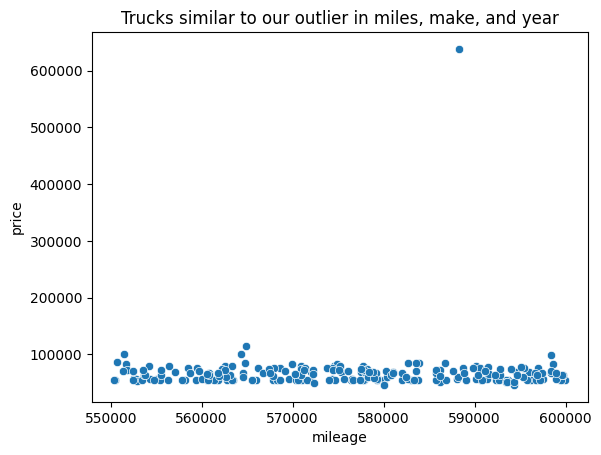

<Figure size 640x480 with 0 Axes>

In [15]:
sns.scatterplot(data_like_outlier, x='mileage', y='price')
plt.title('Trucks similar to our outlier in miles, make, and year')
plt.show()
plt.clf()

Removing outliers from dataset
We will also remove any truck with mileage less than 10000 miles as we are exploring used trucks not new trucks this will also clean our data from really high prices of newer trucks

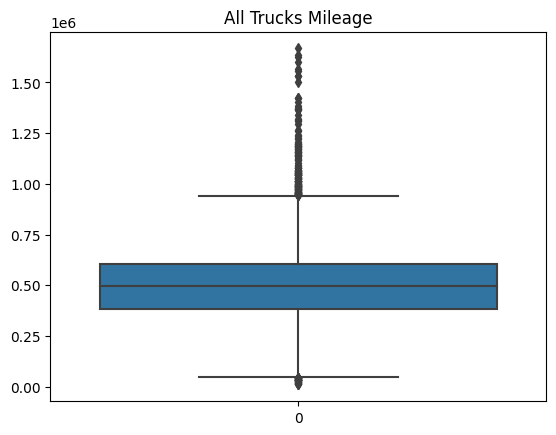

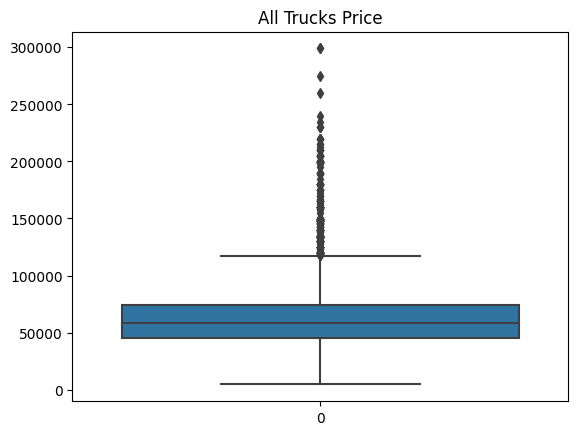

<Figure size 640x480 with 0 Axes>

In [16]:
data = data[data['price'] < 600000]
data = data[data['mileage'].between(10000, 2000000)]

sns.boxplot(data['mileage'])
plt.title('All Trucks Mileage')
plt.show()
plt.clf()
sns.boxplot(data['price'])
plt.title('All Trucks Price')
plt.show()
plt.clf()


In [17]:
data.describe()

,mileage,price
count,8.155000e+03,8155.000000
mean,4.947217e+05,61926.461925
std,1.893404e+05,28069.172220
min,1.105000e+04,4500.000000
25%,3.827125e+05,45495.000000
50%,4.956900e+05,58500.000000
75%,6.062580e+05,74313.500000
max,1.667000e+06,299000.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8155 entries, 0 to 8175
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mileage  8155 non-null   int64  
 1   dealer   8155 non-null   object 
 2   price    8155 non-null   float64
 3   make     8155 non-null   object 
 4   website  8155 non-null   object 
 5   year     8155 non-null   object 
 6   model    8155 non-null   object 
 7   city     8155 non-null   object 
 8   state    8155 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 895.1+ KB
